<p align="center">
  <!-- Language / Core -->
  <img alt="Python" src="https://img.shields.io/badge/Python-3.9%2B-blue?logo=python&logoColor=white">
  <img alt="NumPy" src="https://img.shields.io/badge/NumPy-1.24%2B-013243?logo=numpy&logoColor=white">
  <img alt="Pandas" src="https://img.shields.io/badge/Pandas-2.x-150458?logo=pandas&logoColor=white">
  <img alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-plotting-11557C?logo=python&logoColor=white">
  <img alt="Seaborn" src="https://img.shields.io/badge/Seaborn-statistical%20plots-0EA5E9">
  <img alt="SciPy" src="https://img.shields.io/badge/SciPy-Mann--Whitney%20U%20%7C%20Chi--square-0B61A4?logo=scipy&logoColor=white">
  
  <!-- Modeling / ML stack -->
  <img alt="scikit-learn RF" src="https://img.shields.io/badge/scikit--learn-RandomForest%20OVR-F7931E?logo=scikitlearn&logoColor=white">
  <img alt="Encoders" src="https://img.shields.io/badge/Encoders-OneHot%20%7C%20LOO%20%7C%20CatBoost-10B981">
  <img alt="Metrics" src="https://img.shields.io/badge/Metrics-Accuracy%20%7C%20Precision%20%7C%20Recall%20%7C%20F1%20%7C%20ROC%20AUC-6366F1">
  <img alt="SHAP" src="https://img.shields.io/badge/SHAP-global%20%26%20local%20importance-8B5CF6">
  <img alt="LightGBM" src="https://img.shields.io/badge/Optional-LightGBM-00B300?logo=lightgbm&logoColor=white">
  <img alt="XGBoost" src="https://img.shields.io/badge/Optional-XGBoost-EB4C2B">
  
  <!-- Purpose / Features -->
  <img alt="Task" src="https://img.shields.io/badge/Task-Cluster%20interpretability-312E81">
  <img alt="Contrastive analysis" src="https://img.shields.io/badge/Analysis-Contrastive%20importance%20(A%20vs%20B)-F59E0B">
  <img alt="Distributions" src="https://img.shields.io/badge/Plots-Histograms%20%7C%20Stacked%20bars-4B5563">
  <img alt="Narratives" src="https://img.shields.io/badge/Output-Cluster%20narratives%20%26%20summaries-EC4899">
  <img alt="Exports" src="https://img.shields.io/badge/Exports-CSV%20summary%20%7C%20PNG%20SHAP%20plots-6B7280">
  
  <!-- Meta -->
  <img alt="License" src="https://img.shields.io/badge/License-MIT-000000">
  <img alt="Status" src="https://img.shields.io/badge/Status-Alpha%20library-brightgreen">
  <a href="https://pypi.org/project/clusterlens/">
    <img alt="PyPI" src="https://img.shields.io/pypi/v/clusterlens.svg?label=PyPI&color=3775A9&logo=pypi&logoColor=white">
  </a>
</p>


<p align="center">
  <!-- Replace the src URL below with your actual ClusterLens logo asset -->
  <img src="https://github.com/user-attachments/assets/31214062-e972-43e1-a6a6-4116821002cb"  
       alt="ClusterLens logo" width="320" height="320" />
</p>

Please note that this open-source library is currently in its beta phase. If you encounter any issues or have suggestions, we encourage you to share them. We are committed to addressing feedback promptly. Your contributions and ideas are greatly appreciated!.

# **ClusterLens**

**ClusterLens** is an interpretability engine for **clustered / segmented data**.

You already have clusters - customer segments, user personas, product tiers, risk bands.  
ClusterLens answers the harder questions:

- What actually *drives* each cluster?
- How is Cluster 1 different from Cluster 3 in a statistically meaningful way?
- Which features make Cluster A "high value" or "high risk" compared to others?
- How can I turn a big table into cluster narratives that non-ML stakeholders can read?

ClusterLens sits on top of **any clustering method** (k-means, GMM, HDBSCAN, rule-based labels, etc.).  
All it requires is a `DataFrame` with a column that holds the cluster labels.


## **Key ideas**

ClusterLens wraps a **train-once, reuse-everywhere** pipeline:

1. One **shared train/test split**, stratified by cluster.  
2. A **one-vs-rest classifier per cluster** (RandomForest by default, optional LightGBM / XGBoost).  
3. **SHAP values** computed on a held-out evaluation set for each cluster.  
4. A set of utilities that reuse this shared state to give you interpretations and exports:

   - Global & per-cluster **classification metrics** - `get_cluster_classification_stats()`  
   - Per-cluster **feature rankings** - `get_top_shap_features(...)`, `plot_cluster_shap(...)`  
   - **Contrastive importance** between two clusters - `contrastive_importance(...)`  
   - **Distribution plots** across clusters - `compare_feature_across_clusters(...)`  
   - Markdown-ready **cluster narratives** - `generate_cluster_narratives(...)`  
   - A **cluster summary table** and export helpers:

It is built to be:

- **Model-agnostic on the clustering side**: ClusterLens never clusters; it interprets the labels you already have.
- **Numerically honest**: Combines SHAP with effect sizes (`Cohen's d`, standardized median gaps, Cramér’s V, lifts).
- **Report-friendly**: Outputs narratives and tables you can drop directly into notebooks, dashboards, or slide decks.


## **Library documentation**

Interactive, full documentation for the library is available **[here](https://clusterlens-documentation.streamlit.app/)**. The documentation app mirrors the API, shows example calls, and is the best place to explore ClusterLens features end to end.


## **Dataset**

The dataset used in this notebook contains **153,755** credit customers and **13** features. It is a cleaned / feature-engineered slice of a consumer credit portfolio (**[original dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data)**) that we'll use to
demonstrate how **ClusterLens** can explain clusters.

Each row represents a unique client identified by `SK_ID_CURR`.  
The target variable is **`TARGET`**, which indicates whether the client had difficulty repaying
their loan:

* `Default`: the client eventually defaulted on the loan  
* `Repaid`: the loan was repaid without major issues

We also include a **`Cluster`** column, which comes from a prior clustering step (K-means). ClusterLens will treat this as the label to interpret.

---

**Some of the key features include:**

* `EXT_SOURCE_MEAN`: average of external risk scores from third-party sources  
* `GOODS_TO_CREDIT_RATIO`: ratio between goods price and credit amount  
* `OCCUPATION_TYPE`: main occupation of the client  
* `ORGANIZATION_TYPE`: type of employer / organization  
* `NAME_EDUCATION_TYPE`: highest education level  
* `CODE_GENDER': gender of the client  
* `AGE_YEARS`: client age in years  
* `PHONE_CHANGE_YEARS`: years since the last phone number change  
* `ID_PUBLISH_YEARS`: years since the current ID document was issued  
* `EMPLOYED_YEARS`: years of employment at the current job  
* `Cluster`: cluster label assigned by the upstream clustering algorithm

---

**Dataset highlights:**

* **7 numerical** features (e.g., `EXT_SOURCE_MEAN`, `GOODS_TO_CREDIT_RATIO`, `AGE_YEARS`, …)  
* **6 categorical** features (e.g., `OCCUPATION_TYPE`, `ORGANIZATION_TYPE`, `NAME_EDUCATION_TYPE`, `CODE_GENDER`, `TARGET`, `Cluster`)  
* We'll Use **ClusterLens** to understand what actually differentiates those clusters in a statistically meaningful way.


## **Setup and preliminaries**<a id='Setup_and_preliminaries'></a>
[Contents](#Contents)

### **Import libraries**<a id='Import_libraries'></a>
[Contents](#Contents)

In [1]:
pip install clusterlens # or pip install -U "clusterlens[lightgbm,xgboost]"

In [3]:
# Handle warnings:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="shap")

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*Passing `palette` without assigning `hue`.*",
)

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from clusterlens import ClusterAnalyzer
from sklearn.metrics import (
    silhouette_score, silhouette_samples,
    calinski_harabasz_score, davies_bouldin_score
)
import shap
from category_encoders import CatBoostEncoder
from sklearn.ensemble import RandomForestClassifier
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as mtick




### **Necessary  functions**<a id='Necessary_Functions'></a>
[Contents](#Contents)

In [5]:
def summarize(df):
    unique_counts = df.nunique()
    data_types = df.dtypes
    missing_counts = df.isnull().sum()
    missing_percentage = 100 * df.isnull().mean()
    summary_df = pd.concat([unique_counts, data_types, missing_counts, missing_percentage], axis=1)
    summary_df.columns = ['unique_count', 'data_types', 'missing_counts', 'missing_percentage']
    summary_df = summary_df.reset_index().rename(columns={'index': 'feature'})
    return summary_df
#-----------------------------------------------------------------------------------------------------------------#
def value_counts_with_percentage(df, column_name):
    counts = df[column_name].value_counts(dropna=False)
    percentages = df[column_name].value_counts(dropna=False, normalize=True) * 100
    result = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })

    return result
#-----------------------------------------------------------------------------------------------------------------#
def find_numeric_as_category(df, max_unique=10, exclude_cols=['TARGET', 'SK_ID_CURR']):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    potential_cat = []

    for col in numeric_cols:
        if col in exclude_cols:
            continue
        unique_vals = df[col].nunique()
        if unique_vals <= max_unique:
            potential_cat.append(col)

    return potential_cat


## **Importing dataset**<a id='Importing_dataset'></a>
[Contents](#Contents)

In [7]:
# Read dataset:
df = pd.read_csv("credit_customer_df.csv")

In [8]:
#now, let's look at the shape of df:
shape = df.shape
print("Number of rows:", shape[0], "\nNumber of columns:", shape[1])

Number of rows: 153755 
Number of columns: 13


In [9]:
# Now, let's look at the top 5 rows of the df:
df.head()

,SK_ID_CURR,TARGET,Cluster,EXT_SOURCE_MEAN,GOODS_TO_CREDIT_RATIO,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,CODE_GENDER,AGE_YEARS,PHONE_CHANGE_YEARS,ID_PUBLISH_YEARS,EMPLOYED_YEARS
0,410704,Repaid,0,0.358895,1.000000,Unknown,Business Entity Type 3,Secondary / secondary special,F,44.30,4.80,9.57,5.58
1,381230,Repaid,5,0.644319,0.834725,Accountants,Bank,Higher education,F,40.98,8.95,12.16,0.44
2,450177,Repaid,2,0.524610,1.000000,Unknown,XNA,Secondary / secondary special,F,60.82,0.00,12.80,100.00
3,332445,Repaid,3,0.416154,0.909918,Unknown,XNA,Higher education,M,52.84,5.40,7.79,100.00
4,357429,Repaid,5,0.634572,0.913209,Core staff,Self-employed,Higher education,F,50.40,1.89,5.36,2.43


In [10]:
# Now, let's review the contents of the dataset:
summary_df = summarize(df)
summary_df

,feature,unique_count,data_types,missing_counts,missing_percentage
0,SK_ID_CURR,153755,int64,0,0.0
1,TARGET,2,object,0,0.0
2,Cluster,7,int64,0,0.0
3,EXT_SOURCE_MEAN,151440,float64,0,0.0
4,GOODS_TO_CREDIT_RATIO,2475,float64,0,0.0
5,OCCUPATION_TYPE,19,object,0,0.0
6,ORGANIZATION_TYPE,58,object,0,0.0
7,NAME_EDUCATION_TYPE,5,object,0,0.0
8,CODE_GENDER,2,object,0,0.0
9,AGE_YEARS,4796,float64,0,0.0


In [11]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category")

summary_df = summarize(df)
summary_df


,feature,unique_count,data_types,missing_counts,missing_percentage
0,SK_ID_CURR,153755,int64,0,0.0
1,TARGET,2,category,0,0.0
2,Cluster,7,int64,0,0.0
3,EXT_SOURCE_MEAN,151440,float64,0,0.0
4,GOODS_TO_CREDIT_RATIO,2475,float64,0,0.0
5,OCCUPATION_TYPE,19,category,0,0.0
6,ORGANIZATION_TYPE,58,category,0,0.0
7,NAME_EDUCATION_TYPE,5,category,0,0.0
8,CODE_GENDER,2,category,0,0.0
9,AGE_YEARS,4796,float64,0,0.0


In [12]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'Cluster', 'EXT_SOURCE_MEAN',
       'GOODS_TO_CREDIT_RATIO', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'AGE_YEARS', 'PHONE_CHANGE_YEARS',
       'ID_PUBLISH_YEARS', 'EMPLOYED_YEARS'],
      dtype='object')

In [13]:
num_features=[
    "GOODS_TO_CREDIT_RATIO",
    "EXT_SOURCE_MEAN",
    "AGE_YEARS",
    "PHONE_CHANGE_YEARS",
    "ID_PUBLISH_YEARS",
    "EMPLOYED_YEARS"
    ]
cat_features=[
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE",
    "NAME_EDUCATION_TYPE",
    "CODE_GENDER"
    ]

## **Clusters Interpretation  using ClusterLens**

### **Choosing `eval_max_n` in `ClusterAnalyzer`**

`eval_max_n` controls **how many rows per cluster** are used when computing SHAP
values on the *evaluation* set.

* If a cluster has **fewer** than `eval_max_n` rows → ClusterLens uses **all** of them.
* If a cluster has **more** than `eval_max_n` rows → ClusterLens **subsamples** down to `eval_max_n` rows for that cluster.

This parameter **does not change model training**, it only affects:
* SHAP runtime / memory
* The stability of SHAP distributions and feature rankings



**`eval_max_n` significance**

SHAP for tree models is roughly linear in:

> `#rows x #features x #trees`

On big evaluation sets, this can become slow and memory-heavy without adding much
interpretive value. You almost never need 50k+ rows per cluster for SHAP plots.

`eval_max_n` is a **safety valve**:  
enough rows for stable explanations, but not so many that SHAP becomes painful.


**Summary guidelines**

Use these as general defaults (assuming tree models and a "normal" number of features):

* **Exploratory work / notebooks**
  * `eval_max_n ≈ 2,000-5,000`
  * Good balance of speed and stability for most use cases.
* **Final reports / production analysis**
  * `eval_max_n ≈ 5,000-10,000`
  * Smoother SHAP distributions, still usually manageable in runtime.
* **Very wide data (lots of encoded features, e.g. > 200)**
  * Consider the **lower** end, e.g. `1,000-3,000` to keep SHAP snappy.

If you're unsure, a safe starting point is:

```python
eval_max_n = 5000


### **Create a ClusterAnalyzer**

This is the central object. Here you configure encoders, model type, feature lists, etc:

In [14]:
ca = ClusterAnalyzer(
    df=df,
    # num_features=None: Auto-detect the numeric features (e.g. int64, float64) as numeric features
    num_features=num_features,      # or explicit list: ["AGE_YEARS", "EXT_SOURCE_MEAN", ...]
    # cat_features=None: Treat everything that isn't numeric as categorical
    cat_features=cat_features,      # or explicit list: ["OCCUPATION_TYPE", "TARGET", ...]
    cluster_col="Cluster",  # name of your cluster label column
    random_state=42,
    encoder="onehot",       # "onehot" | "loo" | "catboost"
    model_type="rf",        # "rf" | "lgbm" | "xgb"
    # model_params=None: ClusterLens will create the model with standard defaults depends on the selected model
    model_params=None,      # dict of estimator hyperparams, e.g. {"n_estimators": 300}
    eval_max_n=5000,        # cap SHAP eval rows per cluster (None = use all)
)


### **Choosing `sample_n` in `ClusterAnalyzer.fit`**

`sample_n` is **optional**. Use it only when your dataset is large and you want to speed things up.

ClusterLens first (optionally) subsamples your `DataFrame`, then performs a **stratified train/test split by cluster** (if `stratify_sample=True`, which is the default).

The key principle:

> **Never downsample so aggressively that the smallest cluster becomes tiny.**

**1. Inspect cluster sizes:**

Start by understanding the cluster distribution:




In [15]:
cluster_counts = df["Cluster"].value_counts().sort_index()
total_n        = len(df)

p_min          = cluster_counts.min() / total_n  # share of the smallest cluster
n_min_cluster  = cluster_counts.min()            # absolute size of smallest cluster

print(cluster_counts)
print(f"Total rows: {total_n}")
print(f"Smallest cluster size: {n_min_cluster} ({p_min:.2%} of data)")

Cluster
0    56424
1    11620
2    19497
3     5076
4    36073
5    22008
6     3057
Name: count, dtype: int64
Total rows: 153755
Smallest cluster size: 3057 (1.99% of data)


**2. Choose a target rows-per-cluster `R`**

Pick how many rows you want to retain for the smallest cluster after sampling.
This is a trade-off between stability and runtime.

Typical ranges:

* Exploratory / quick runs: R ≈ 500-800
* Reporting / more stable analysis: R ≈ 1,000-2,000
* High-stakes analysis: you can choose a larger R if runtime allows.

> We set `R = 1,500` to ensure the smallest cluster retains ~1.5k examples in the subsample.


**3. Compute a safe sample_n**

Use the smallest cluster share `p_min` to compute the overall sample size:

In [16]:
# target rows for smallest cluster:
R = 1500

sample_n_min = int(R / p_min)

# Do not exceed the full dataset size:
sample_n = min(total_n, sample_n_min)

print(f"Using sample_n = {sample_n}")


Using sample_n = 75444


**4. Special cases & general rules**

* Case A: Smallest cluster already large (e.g., ≥ 5,000-10,000 rows)
If n_min_cluster is already big:
  * You do not need sample_n for statistical reasons.
  * You can:
     * keep sample_n=None (use full data), or
     * still downsample for speed using the same R / p_min formula if training / SHAP is too slow.

* Case B: Very rare or tiny clusters (e.g., < 1% share or a few hundred rows)
If the smallest cluster is very rare:
  * The formula may give you a sample_n_min close to or larger than total_n.
  * In that situation:
     * set sample_n=None (no subsampling), or
     * lower R (e.g., from 1500 → 800) and recompute sample_n_min.

> Your goal is to avoid starving the rare cluster while still improving runtime.

* Case C: Smallest cluster has ~10k rows
If, for example:
  * n_min_cluster ≈ 10,000
  * p_min is still small (e.g., a few percent of a very large dataset),

you can:
  * Keep R in the same 1,000-2,000 range.
  * Compute sample_n from R / p_min.
  * This lets you keep enough examples from the rare cluster while shrinking the overall dataset substantially.

**Summary Guidelines**

* Compute cluster_counts, p_min, and n_min_cluster.
* Choose R (target rows for smallest cluster), e.g. 1,000-1,500.
* Compute sample_n = min(total_n, R / p_min).
* Call ca.fit(..., sample_n=sample_n, stratify_sample=True).
* Inspect ca.get_split_table() and adjust R if needed.


### **Fit models with .fit(...) (sampling & split knobs)**

This runs the one-vs-rest models once and caches everything **ClusterLens** needs:

In [17]:
ca.fit(
    test_size=0.2,          # fraction for test set
    sample_n=sample_n,      # e.g. 50_000 to subsample big tables by row count
    sample_frac=None,       # or e.g. 0.5 to take 50% of rows
    stratify_sample=True,   # preserve cluster proportions when sampling
)


 99%|===================| 9907/10000 [00:29<00:00]       

### **Per-cluster classification metrics: get_cluster_classification_stats**

Here, let's check  how well each one-vs-rest model separates its cluster from the rest:

In [18]:
metrics = ca.get_cluster_classification_stats()
metrics

,Cluster,Accuracy,Precision,Recall,F1,ROC_AUC,TN,FP,FN,TP
0,0,0.998277,0.996755,0.998555,0.997654,0.999987,9534,18,8,5529
1,1,0.999271,0.997357,0.992982,0.995165,0.999966,13946,3,8,1132
2,2,0.999934,0.999478,1.000000,0.999739,1.000000,13174,1,0,1914
3,3,0.999934,0.997996,1.000000,0.998997,1.000000,14590,1,0,498
4,4,0.999602,0.998308,1.000000,0.999153,0.999965,11543,6,0,3540
5,5,0.998741,0.997675,0.993519,0.995593,0.999729,12924,5,14,2146
6,6,0.999934,0.996678,1.000000,0.998336,1.000000,14788,1,0,300


### **Train/test sanity checks & exports**

Here, let's ensure our train/test split is balanced per cluster:

In [19]:
split_tbl = ca.get_split_table()
split_tbl

,Cluster,train one,train rest,test one,test rest,cluster size,dataset rows,%
0,0,22149,38206,5537,9552,27686,75444,0.800007
1,1,4561,55794,1140,13949,5701,75444,0.800035
2,2,7653,52702,1914,13175,9567,75444,0.799937
3,3,1993,58362,498,14591,2491,75444,0.800080
4,4,14160,46195,3540,11549,17700,75444,0.800000
5,5,8639,51716,2160,12929,10799,75444,0.799981
6,6,1200,59155,300,14789,1500,75444,0.800000


### **SHAP feature importance per cluster**



#### **Table view: get_top_shap_features(...)**

Here, let's rank features by mean |SHAP| per cluster:



In [20]:
top_feats = ca.get_top_shap_features(
    top_n=2,                      # None = all features
    importance_scope="positive",  # "positive" | "negative" | "all"
)
top_feats.head(20)

,Cluster,Feature,Abs_SHAP
0,0,CODE_GENDER,0.217450
1,0,NAME_EDUCATION_TYPE,0.164998
2,1,NAME_EDUCATION_TYPE,0.259632
3,1,CODE_GENDER,0.196130
4,2,EMPLOYED_YEARS,0.259203
5,2,ORGANIZATION_TYPE,0.258119
6,3,CODE_GENDER,0.373589
7,3,EMPLOYED_YEARS,0.238222
8,4,CODE_GENDER,0.336293
9,4,NAME_EDUCATION_TYPE,0.105389


**importance_scope**
* "positive": Why points inside the cluster look like they do.
* "negative": That keeps points out of the cluster.
* "all": Global discriminative view for that OVR model.

#### **Plot view: plot_cluster_shap(...)**

Here, let's visualize the SHAP rankings for each cluster as bar plots:

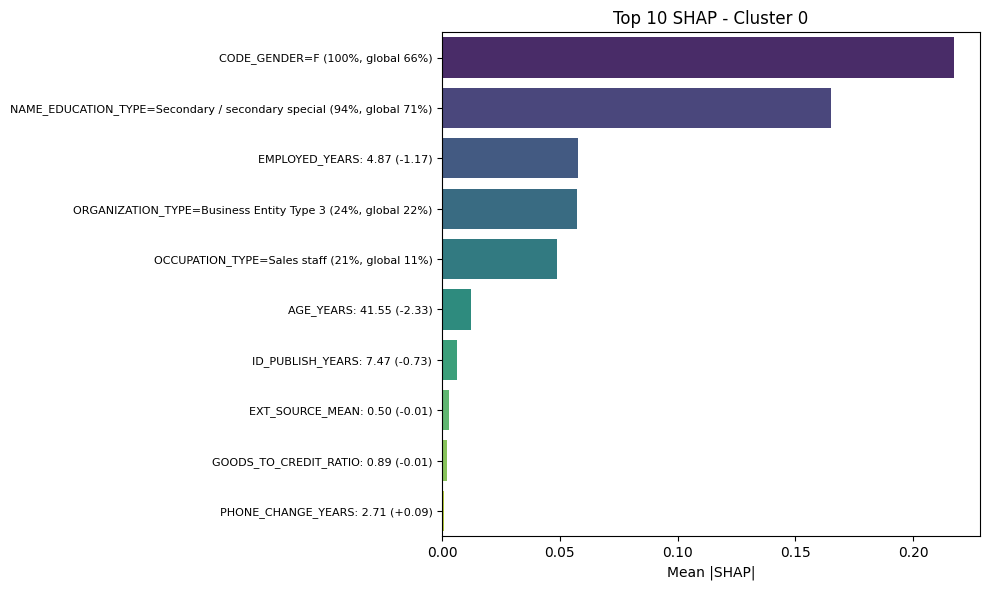

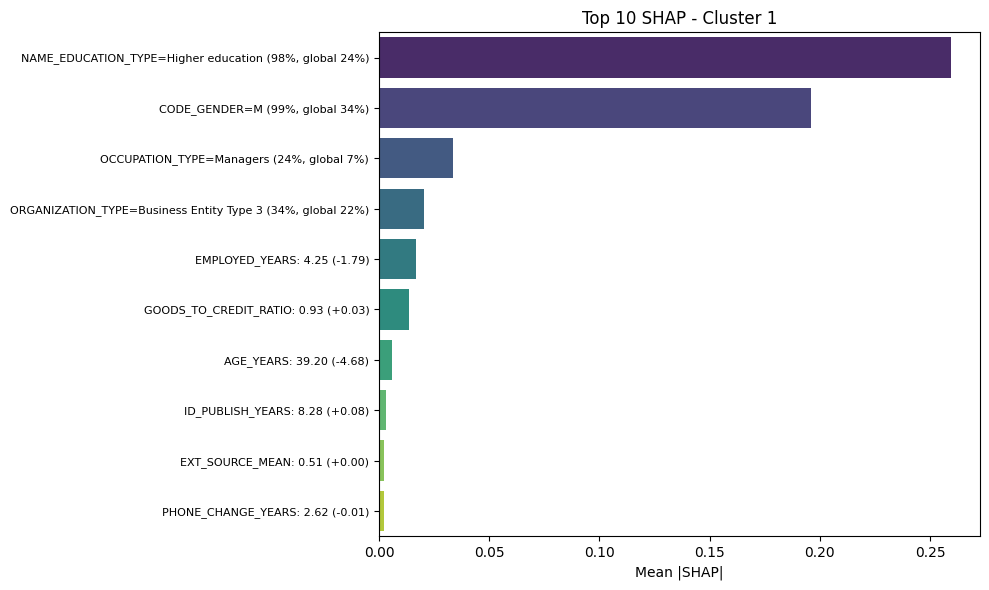

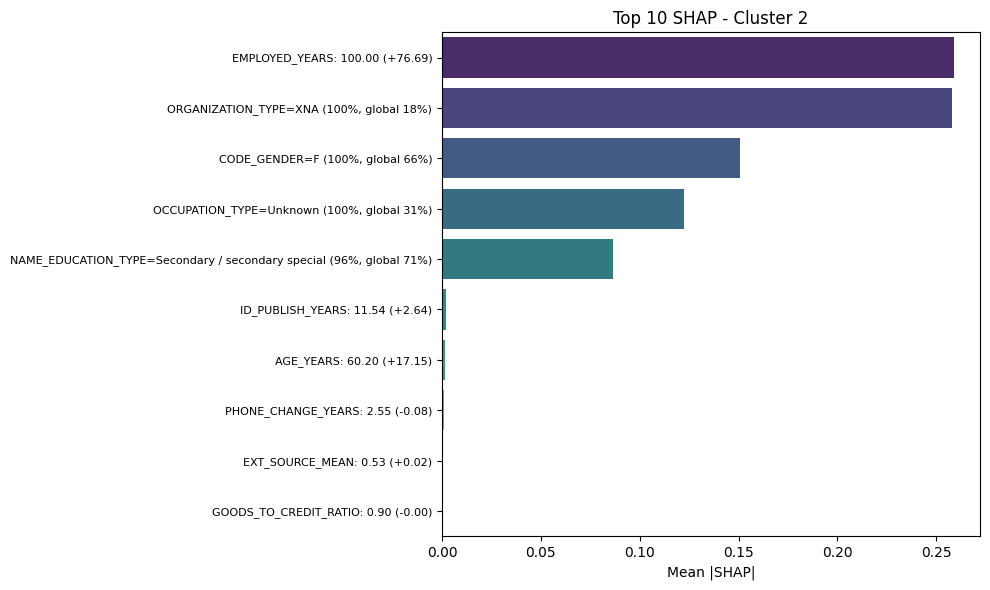

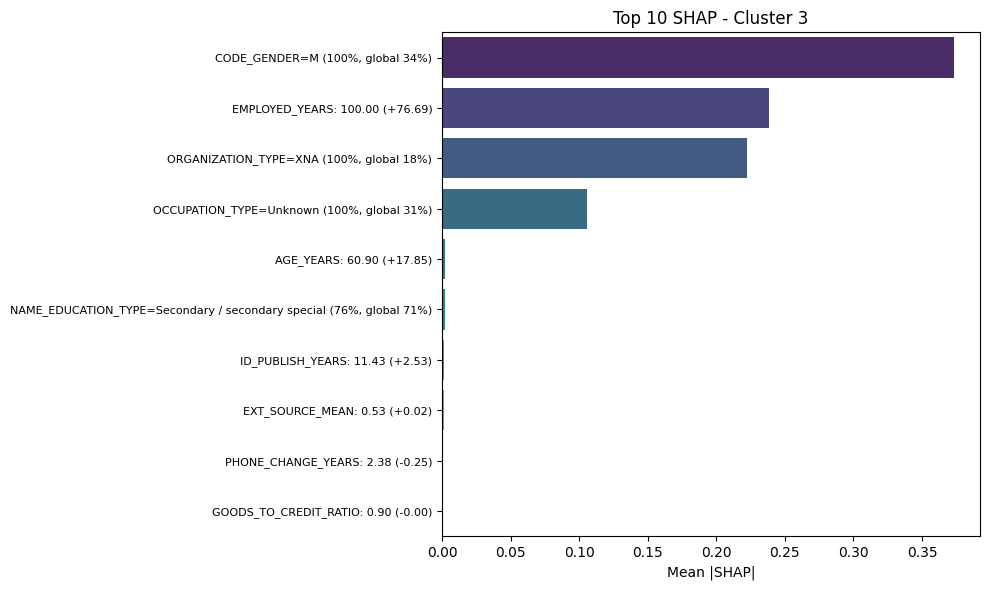

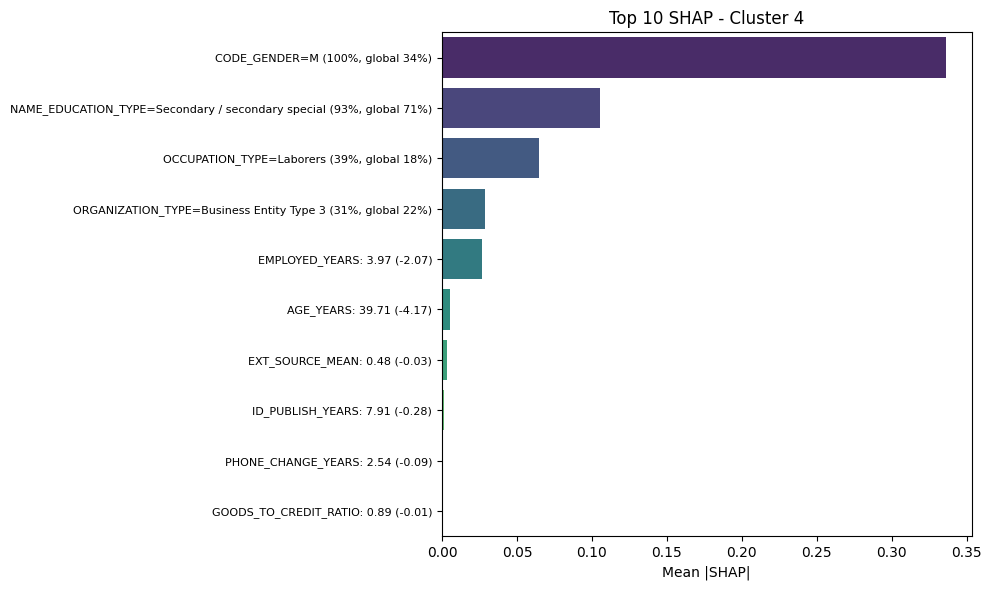

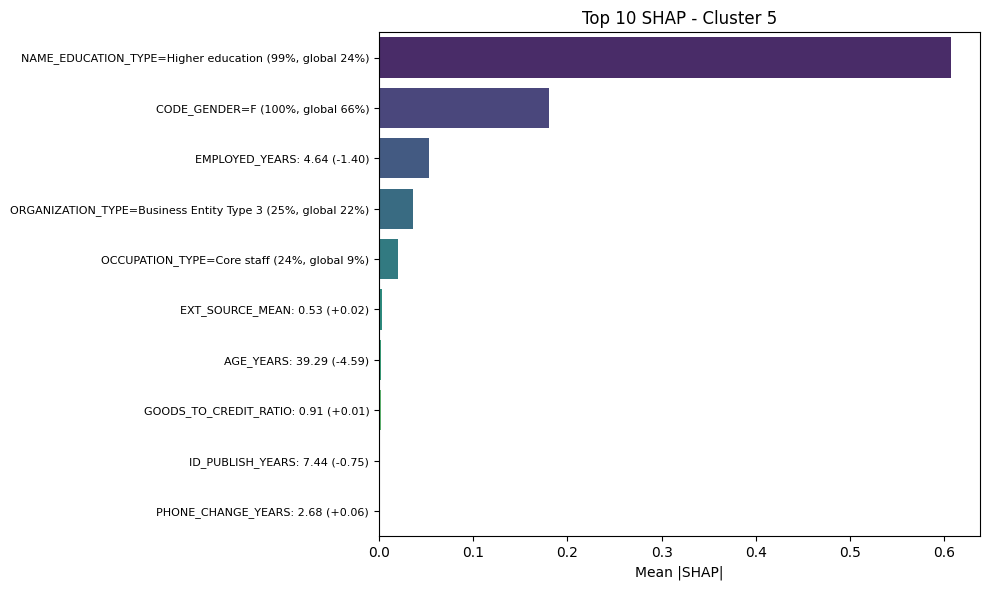

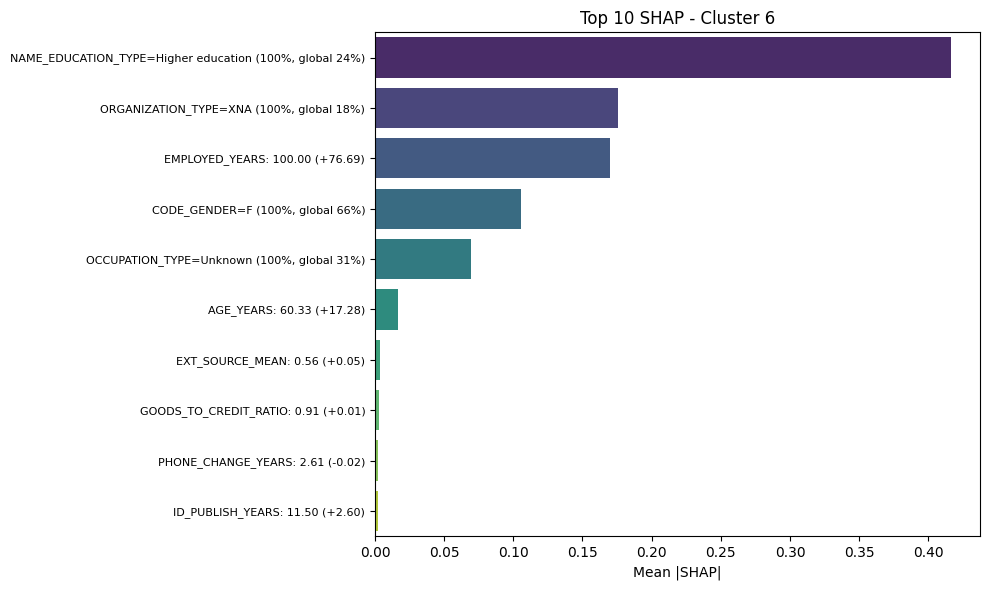

In [21]:
ca.plot_cluster_shap(
    top_n=10,                     # None = all features
    importance_scope="positive",  # "positive" | "negative" | "all"
    show=True,
)

In [36]:
scopes = ["positive", "negative", "all"]
results = {}

for scope in scopes:
    tf = ca.get_top_shap_features(top_n=None, importance_scope=scope)
    # aggregate per feature so it's easier to compare:
    agg = (
        tf.groupby("Feature")["Abs_SHAP"]
          .mean()
          .sort_values(ascending=False)
    )
    results[scope] = agg

for scope in scopes:
    print(f"\n=== {scope} ===")
    print(results[scope].head(10))



=== positive ===
Feature
NAME_EDUCATION_TYPE      0.234689
CODE_GENDER              0.222886
EMPLOYED_YEARS           0.117257
ORGANIZATION_TYPE        0.114069
OCCUPATION_TYPE          0.066267
AGE_YEARS                0.006710
GOODS_TO_CREDIT_RATIO    0.003169
ID_PUBLISH_YEARS         0.002585
EXT_SOURCE_MEAN          0.002578
PHONE_CHANGE_YEARS       0.001320
Name: Abs_SHAP, dtype: float64

=== negative ===
Feature
CODE_GENDER              0.154427
NAME_EDUCATION_TYPE      0.120044
EMPLOYED_YEARS           0.036161
ORGANIZATION_TYPE        0.032465
OCCUPATION_TYPE          0.025056
AGE_YEARS                0.004175
GOODS_TO_CREDIT_RATIO    0.002150
ID_PUBLISH_YEARS         0.001313
EXT_SOURCE_MEAN          0.001239
PHONE_CHANGE_YEARS       0.000571
Name: Abs_SHAP, dtype: float64

=== all ===
Feature
CODE_GENDER              0.154156
NAME_EDUCATION_TYPE      0.127136
EMPLOYED_YEARS           0.040211
ORGANIZATION_TYPE        0.037162
OCCUPATION_TYPE          0.027914
AGE_YEARS      

### **Contrastive importance: contrastive_importance(...)**

Here, let's compare cluster 0 vs cluster 1 to see what seperates them:

In [22]:
contrast_ab = ca.contrastive_importance(
    cluster_a=0,
    cluster_b=1,
    top_n=10,                     # None = all features
    importance_scope="positive",  # which rows feed SHAP ("positive" usually good)
    mode="hybrid",                # "shap" | "effect" | "hybrid"
    weight_shap=1.0,
    weight_effect=1.0,
    min_support=0.05,             # ignore rare categories (<5% of cluster)
)
contrast_ab.head(20)


,Feature,Score,SHAP_norm,StdMedianGap_norm,CohensD_norm,Lift_norm,CramersV_norm
0,CODE_GENDER,1.973794,0.973794,0.000000,0.000000,1.000000,0.0
1,NAME_EDUCATION_TYPE,1.904104,1.000000,0.000000,0.000000,0.904104,0.0
2,GOODS_TO_CREDIT_RATIO,1.886281,0.029200,0.857082,1.000000,0.000000,0.0
3,AGE_YEARS,1.654657,0.036100,1.000000,0.618558,0.000000,0.0
4,ID_PUBLISH_YEARS,1.316052,0.015879,0.790895,0.509278,0.000000,0.0
5,EMPLOYED_YEARS,0.879743,0.168598,0.365211,0.345934,0.000000,0.0
6,OCCUPATION_TYPE,0.566655,0.187650,0.000000,0.000000,0.379005,0.0
7,EXT_SOURCE_MEAN,0.475625,0.005310,0.262695,0.207620,0.000000,0.0
8,PHONE_CHANGE_YEARS,0.285417,0.000000,0.180070,0.105347,0.000000,0.0
9,ORGANIZATION_TYPE,0.236867,0.177860,0.000000,0.000000,0.059007,0.0


**Mode:**
* "shap": model-centric view
* "effect": raw data contrasts only (Cohen's d, median gaps, Cramer's V, lifts)
* "hybrid": weighted blend of both

### **Distribution plots across clusters: compare_feature_across_clusters(...)**

Here, let's see how a single feature is distributed across clusters (histograms / stacked bars).

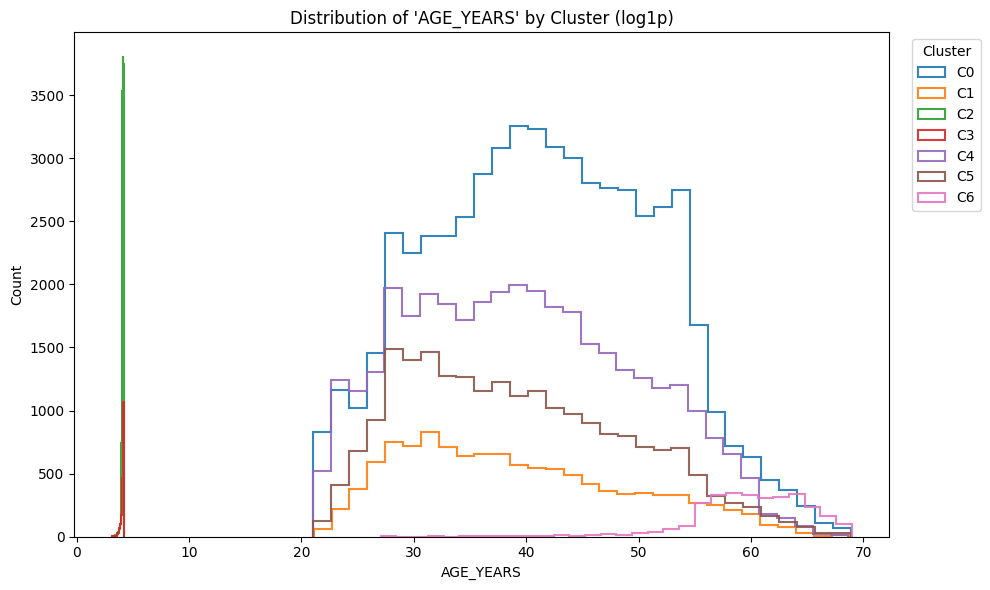

In [38]:
# Single numeric feature:
ca.compare_feature_across_clusters(
    # feature=None to loop over all numeric features and produce a faceted grid:
    feature="AGE_YEARS",
    bins=30,
    auto_log_skew=1.5,  # log1p for heavily skewed non-negative vars
    linewidth=1.5,
    alpha=0.9,
)

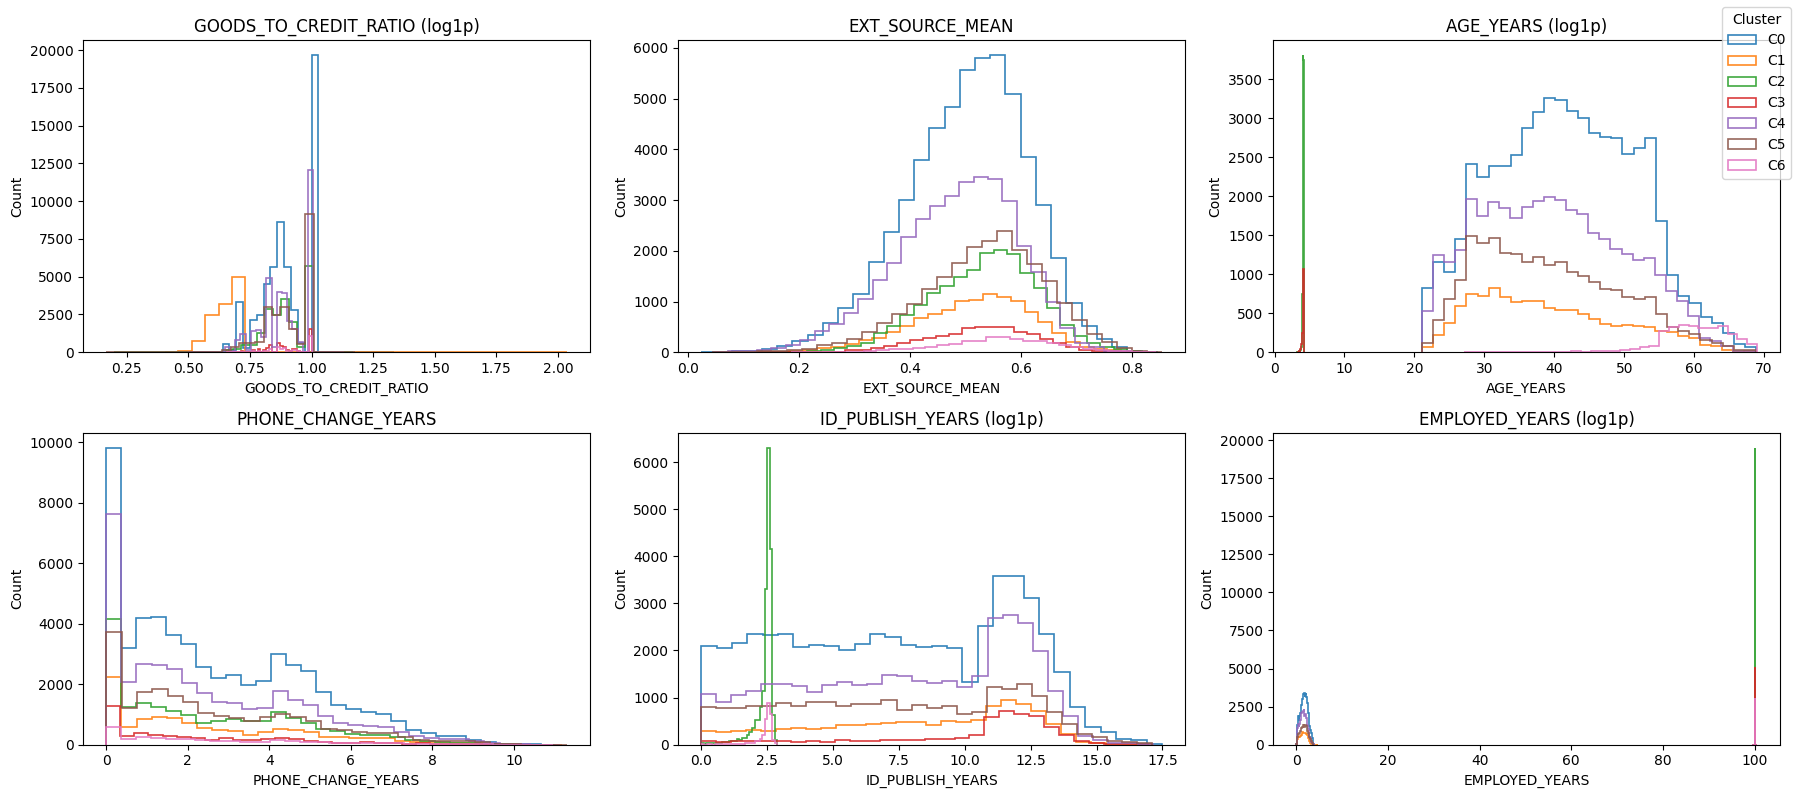

In [24]:
# Single numeric feature:
ca.compare_feature_across_clusters(
    # feature=None to loop over all numeric features and produce a faceted grid:
    feature=None,
    bins=30,
    auto_log_skew=1.5,  # log1p for heavily skewed non-negative vars
    linewidth=1.5,
    alpha=0.9,
)

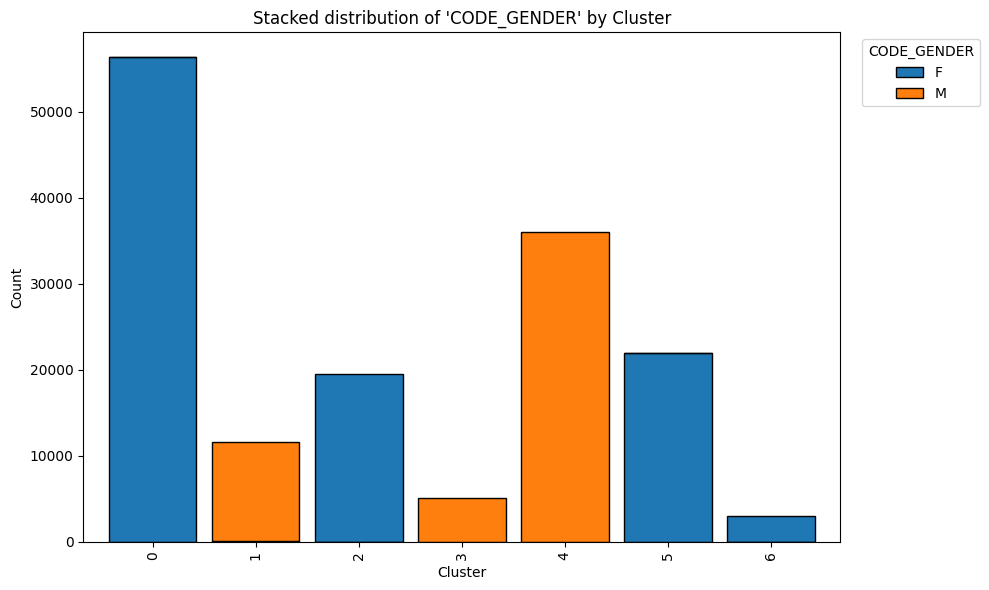

In [33]:
# Single categorical feature:
ca.compare_feature_across_clusters(
    # feature=None to loop over all numeric features and produce a faceted grid:
    feature="CODE_GENDER",
    bins=30,            # ignored for categorical
    auto_log_skew=None, # ignored for categorical
)

### **Human-readable narratives: generate_cluster_narratives(...)**

Here's, let's produce auto-generate Markdown bullet points summarizing each cluster.

In [26]:
narratives = ca.generate_cluster_narratives(
    top_n=5,                 # bullets per cluster for numeric & categorical drivers
    min_support=0.05,        # drop very rare categories
    output="markdown",       # "markdown" | "dict" : output="dict" to build custom UIs
)

# Example-1: print Cluster 0 narrative
print(narratives[0])

### Cluster 0 — N=56424 (37%)

- High/low numeric drivers: ID_PUBLISH_YEARS: low (-0.19 IQR units), d=-0.28, p=<0.001, EMPLOYED_YEARS: low (-0.09 IQR units), d=-0.75, p=<0.001, AGE_YEARS: low (-0.08 IQR units), d=-0.31, p=<0.001, EXT_SOURCE_MEAN: low (-0.04 IQR units), d=-0.08, p=<0.001, PHONE_CHANGE_YEARS: high (0.03 IQR units), d=0.06, p=<0.001

- Dominant categories: OCCUPATION_TYPE=Medicine staff (7%, global 3%), lift=2.39, V=0.47, ORGANIZATION_TYPE=Medicine (7%, global 4%), lift=2.01, V=0.44, CODE_GENDER=F (100%, global 66%), lift=1.52, V=0.55, NAME_EDUCATION_TYPE=Incomplete higher (5%, global 3%), lift=1.51, V=0.43

- Key differences vs nearest: vs C4: AGE_YEARS higher (0.15 IQR units), vs C4: EMPLOYED_YEARS higher (0.14 IQR units), vs C4: EXT_SOURCE_MEAN higher (0.13 IQR units), vs C4: ID_PUBLISH_YEARS lower (-0.11 IQR units), vs C4: PHONE_CHANGE_YEARS higher (0.07 IQR units)


In [27]:
# Examp-2: print Cluster 1 narrative
print(narratives[1])

### Cluster 1 — N=11620 (8%)

- High/low numeric drivers: AGE_YEARS: low (-0.28 IQR units), d=-0.43, p=<0.001, GOODS_TO_CREDIT_RATIO: high (0.20 IQR units), d=0.41, p=<0.001, EMPLOYED_YEARS: low (-0.14 IQR units), d=-0.52, p=<0.001, EXT_SOURCE_MEAN: high (0.03 IQR units), d=0.03, p=<0.001, PHONE_CHANGE_YEARS: low (-0.01 IQR units), d=-0.00, p=0.903

- Dominant categories: NAME_EDUCATION_TYPE=Higher education (98%, global 24%), lift=4.04, V=0.49, OCCUPATION_TYPE=Managers (24%, global 7%), lift=3.51, V=0.25, CODE_GENDER=M (99%, global 34%), lift=2.88, V=0.39, ORGANIZATION_TYPE=Business Entity Type 3 (34%, global 22%), lift=1.51, V=0.20

- Key differences vs nearest: vs C4: GOODS_TO_CREDIT_RATIO higher (0.22 IQR units), vs C4: EXT_SOURCE_MEAN higher (0.20 IQR units), vs C4: AGE_YEARS lower (-0.10 IQR units), vs C4: ID_PUBLISH_YEARS higher (0.09 IQR units), vs C4: EMPLOYED_YEARS higher (0.05 IQR units)


### **Compact summary table: get_cluster_summary(...)**

Here, let's get a single table that summarizes cluster sizes, key stats, and short contrastive text.

In [28]:
# Use this for a high-level slide or dashboard:
summary = ca.get_cluster_summary(
    sample_size=None,        # subsample rows per cluster, if needed
    top_n_contrast=3,        # how many key contrast bullets to keep
    min_support=0.05,
)
summary.head()

,Cluster,N,Pct,GOODS_TO_CREDIT_RATIO,EXT_SOURCE_MEAN,AGE_YEARS,PHONE_CHANGE_YEARS,ID_PUBLISH_YEARS,EMPLOYED_YEARS,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,CODE_GENDER,Contrast_Numeric,Contrast_Categorical
0,0,56424,37%,0.89 (-0.01),0.50 (-0.01),41.55 (-2.33),2.71 (+0.09),7.47 (-0.73),4.87 (-1.17),"Sales staff (21%, global: 11%)","Business Entity Type 3 (24%, global: 22%)","Secondary / secondary special (94%, global: 71%)","F (100%, global: 66%)","AGE_YEARS higher (0.15 IQR units), EMPLOYED_YE...",OCCUPATION_TYPE=Medicine staff (C0 7% vs C4 0%...
1,1,11620,8%,0.93 (+0.03),0.51 (+0.00),39.20 (-4.68),2.62 (-0.01),8.28 (+0.08),4.25 (-1.79),"Managers (24%, global: 7%)","Business Entity Type 3 (34%, global: 22%)","Higher education (98%, global: 24%)","M (99%, global: 34%)","GOODS_TO_CREDIT_RATIO higher (0.22 IQR units),...","OCCUPATION_TYPE=Managers (C1 24% vs C4 6%, lif..."
2,2,19497,13%,0.90 (-0.00),0.53 (+0.02),60.20 (+17.15),2.55 (-0.08),11.54 (+2.64),100.00 (+76.69),"Unknown (100%, global: 31%)","XNA (100%, global: 18%)","Secondary / secondary special (96%, global: 71%)","F (100%, global: 66%)","EXT_SOURCE_MEAN lower (-0.18 IQR units), GOODS...","OCCUPATION_TYPE=Unknown (C2 100% vs C6 100%, l..."
3,3,5076,3%,0.90 (-0.00),0.53 (+0.02),60.90 (+17.85),2.38 (-0.25),11.43 (+2.53),100.00 (+76.69),"Unknown (100%, global: 31%)","XNA (100%, global: 18%)","Secondary / secondary special (76%, global: 71%)","M (100%, global: 34%)","EXT_SOURCE_MEAN lower (-0.25 IQR units), AGE_Y...","OCCUPATION_TYPE=Unknown (C3 100% vs C6 100%, l..."
4,4,36073,23%,0.89 (-0.01),0.48 (-0.03),39.71 (-4.17),2.54 (-0.09),7.91 (-0.28),3.97 (-2.07),"Laborers (39%, global: 18%)","Business Entity Type 3 (31%, global: 22%)","Secondary / secondary special (93%, global: 71%)","M (100%, global: 34%)","EXT_SOURCE_MEAN lower (-0.33 IQR units), ID_PU...","OCCUPATION_TYPE=Drivers (C4 22% vs C5 0%, lift..."


### **Export summary CSV: export_summary(...)**

Here, to save the cluster summary to disk for further analysis:

In [29]:
ca.export_summary("cluster_summary.csv")

# or
#import os

# saving to a folder:
#out_dir = "folder_name"
#os.makedirs(out_dir, exist_ok=True) # create folder if it doesn't exist
# Full path for the CSV:
#sv_path = os.path.join(out_dir, "cluster_summary.csv")

'cluster_summary.csv'

### **Save SHAP plots as PNGs: save_shap_figs(...)**

Here, let's generate one PNG per cluster for slide decks / docs.

'./shap_figs'

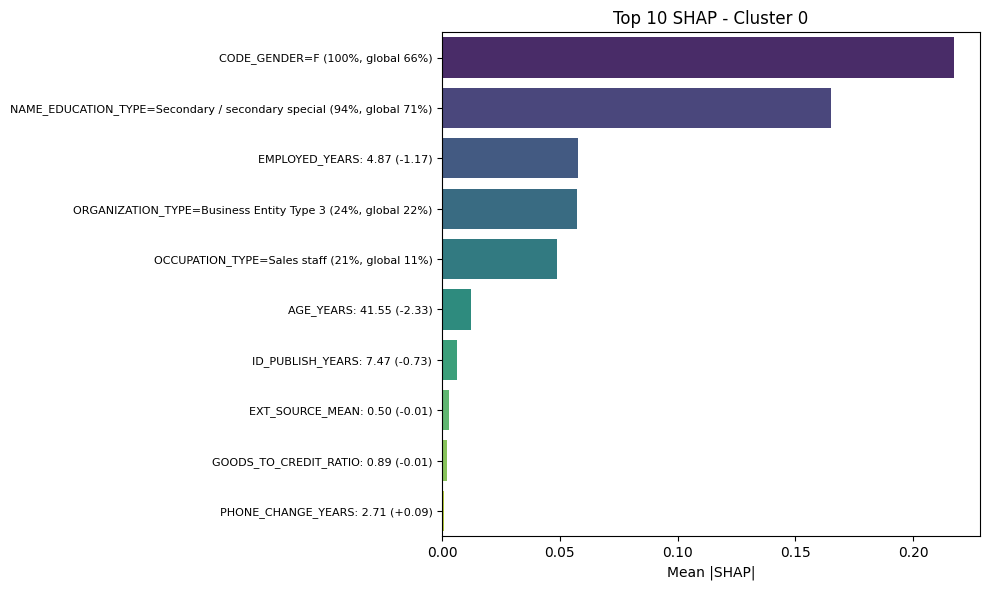

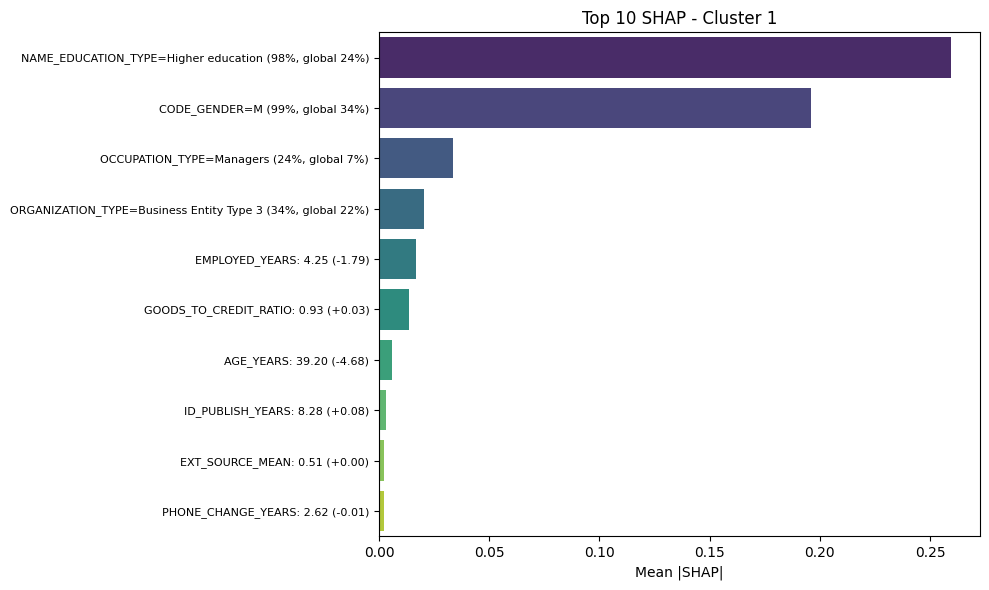

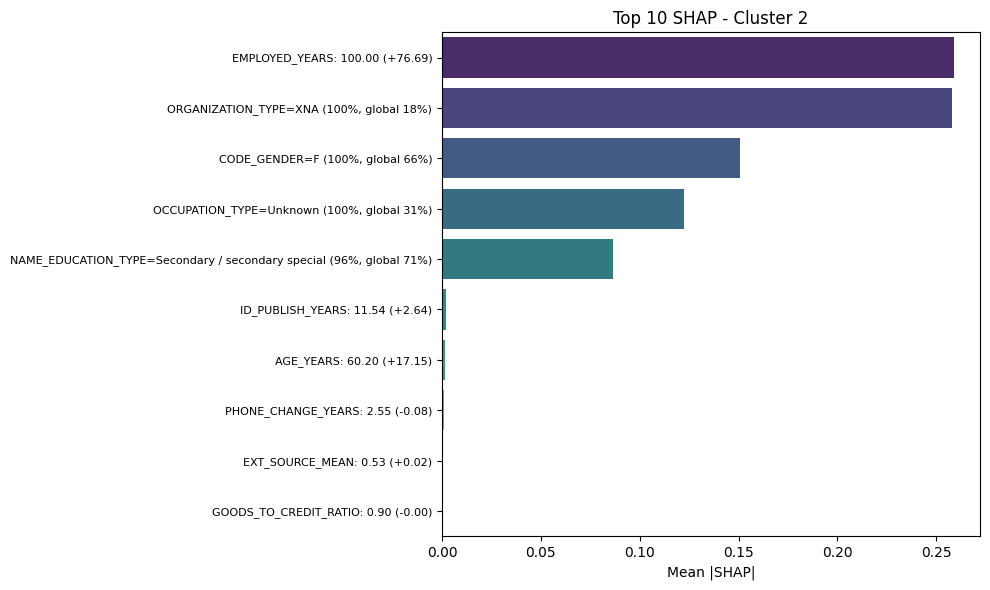

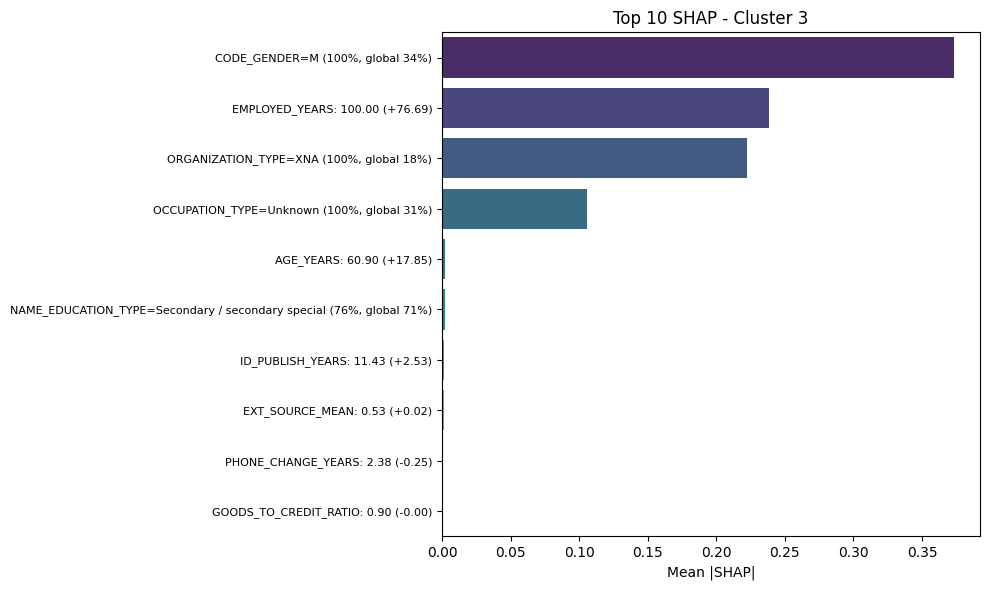

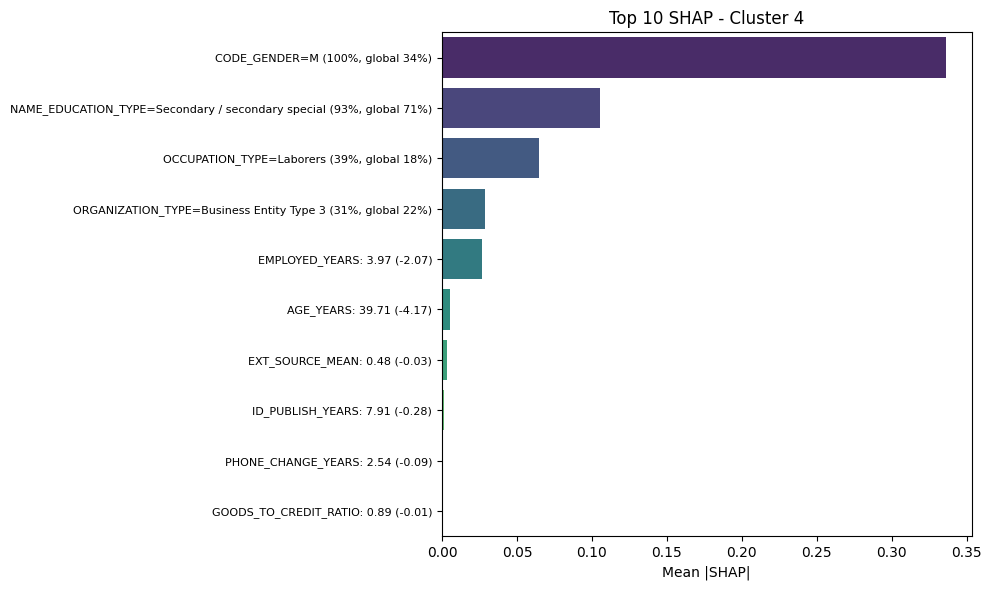

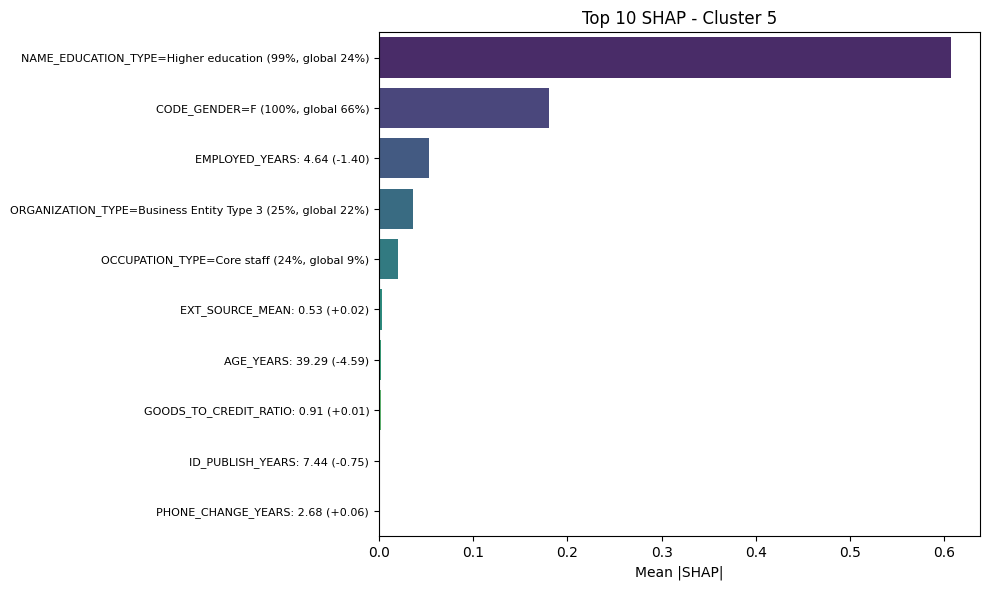

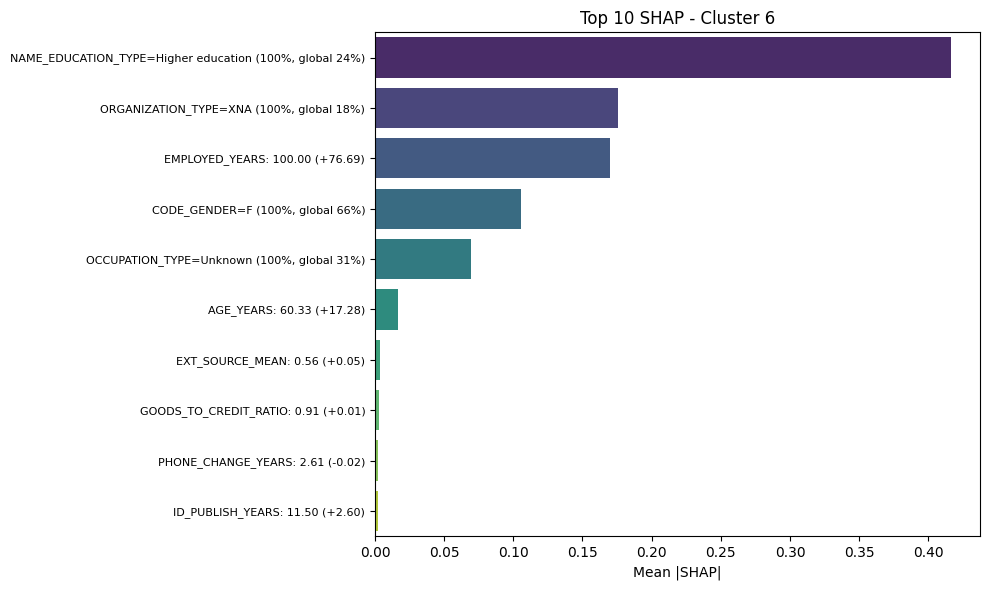

In [30]:
# Make sure you've plotted SHAP first (so figures exist)
ca.plot_cluster_shap(top_n=10, importance_scope="positive", show=False)
ca.save_shap_figs("./shap_figs")

# or
# saving to a folder:
#out_dir = "folder_name"
#os.makedirs(out_dir, exist_ok=True) # create folder if it doesn't exist

# Then save one PNG per cluster into your Drive folder:
#ca.save_shap_figs(out_dir)